In [1]:
import numpy as np
import math
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

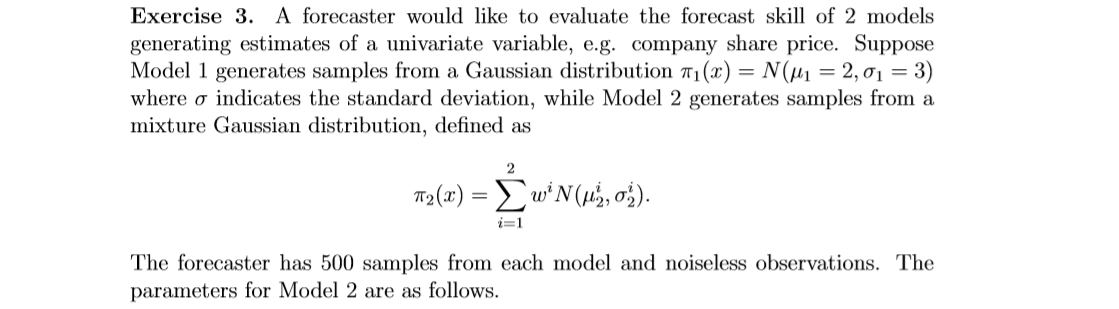

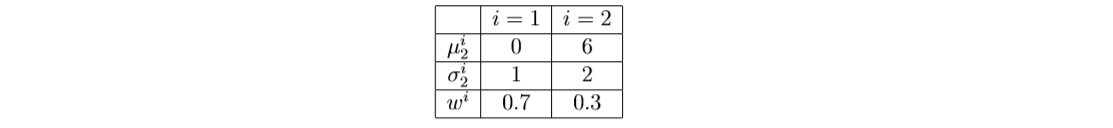

PDF of Model 1
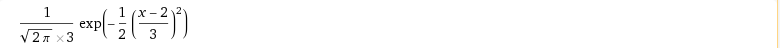

PDF of Model 2
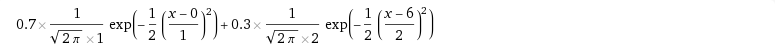

In [6]:
def PDF_Model1(x):
    p = (1/(math.sqrt(2*math.pi)*3))*(math.exp((-1/2)*(((x-2)/3)**2)))
    return p
                                    
def PDF_Model2(x):
    p = (0.7*(1/(math.sqrt(2*math.pi)*1))*(math.exp((-1/2)*(((x-0)/1)**2))) +
                    0.3*(1/(math.sqrt(2*math.pi)*2))*(math.exp((-1/2)*(((x-6)/2)**2))))
    return p

### <Font color=green> Produce histograms of the forecasts from both models.

In [7]:
M = 500 # sample size

def sample_gaussian_mixture(n):
    samples = np.zeros(n)
    for i in range(n):
        u = np.random.rand()
        if u < 0.7:
            samples[i] = np.random.normal(loc=0, scale=1)
        else:
            samples[i] = np.random.normal(loc=6, scale=2)
    return samples

# draw samples
samples_model1 = np.random.normal(loc=2, scale=3, size=M)
samples_model2 = sample_gaussian_mixture(M)

# will be used for setting a range for plotting
min_sample = min(min(samples_model1),min(samples_model2))
max_sample = max(max(samples_model1),max(samples_model2))

Text(0.5, 1.0, 'Histogram of Model 2')

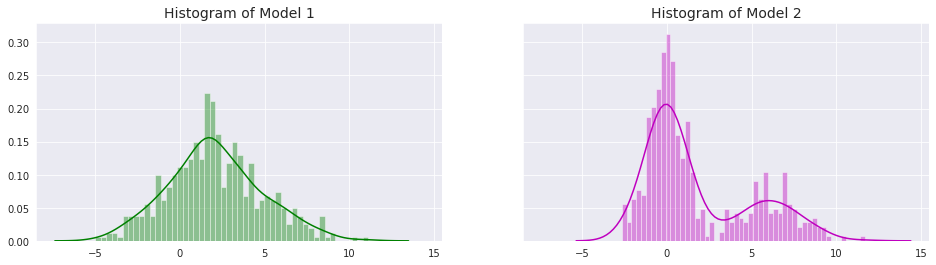

In [8]:
# will be used for setting a range for plotting
min_sample = min(min(samples_model1),min(samples_model2))
max_sample = max(max(samples_model1),max(samples_model2))
# Plot histogram 
fig, axes = plt.subplots(1,2, figsize=(16, 4), sharex=True, sharey=True)
sns.distplot(samples_model1, bins=50, color="g", ax=axes[0]).set_title("Histogram of Model 1", fontsize=14)
sns.distplot(samples_model2, bins=50, color="m", ax=axes[1]).set_title("Histogram of Model 2", fontsize=14)

### <Font color=green> (Emprical) Continuous Ranked Probability Score

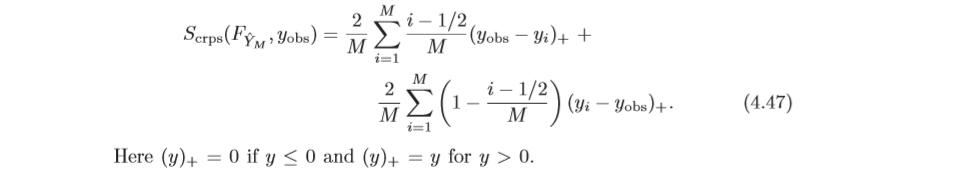

In [9]:
def CRPS(y, y_obs):
    sorted_y = np.sort(y)
    score = 0
    for i in range(len(sorted_y)):
        if y_obs > sorted_y[i]:
            score += (2/M)*(((i+1)-0.5)/M)*(y_obs-sorted_y[i])
        elif sorted_y[i] > y_obs:
            score += (2/M)*(1-(((i+1)-0.5)/M))*(sorted_y[i]-y_obs)
        else:
            continue
    return score

#### (extra) CRPS for a single observation

In [10]:
def EmpricalCDF(data): 
    x = np.sort(data)
    n = data.size
    y = np.arange(1,n+1)/n # quentile 
    return(x, y)

ECDF_Model1_x, ECDF_Model1_y = EmpricalCDF(samples_model1)
ECDF_Model2_x, ECDF_Model2_y = EmpricalCDF(samples_model2)

def Plot_CRPS_forSingleObservation(y_obs):
    fig, axes = plt.subplots(1,2, figsize=(16, 4), sharex=True, sharey=True)
    sns.scatterplot(ECDF_Model1_x, ECDF_Model1_y, marker='+', size=1, legend=False, ax=axes[0]).set_title(
        "Emperical CDF of Model 1", fontsize=14)
    sns.scatterplot(ECDF_Model2_x, ECDF_Model2_y, marker='+', size=1, legend=False, ax=axes[1]).set_title(
        "Emperical CDF of Model 2", fontsize=14)
    axes[0].set_xlabel(xlabel="CRPS with y_obs {} : {:.4f}".format(y_obs, CRPS(samples_model1, y_obs)), fontsize=13)
    axes[1].set_xlabel(xlabel="CRPS with y_obs {} : {:.4f}".format(y_obs, CRPS(samples_model2, y_obs)), fontsize=13)
    x = [min_sample, y_obs, max_sample]
    y = [0, 0, 1]
    sns.lineplot(x, y, drawstyle='steps-pre', ax=axes[0])
    sns.lineplot(x, y, drawstyle='steps-pre', ax=axes[1])

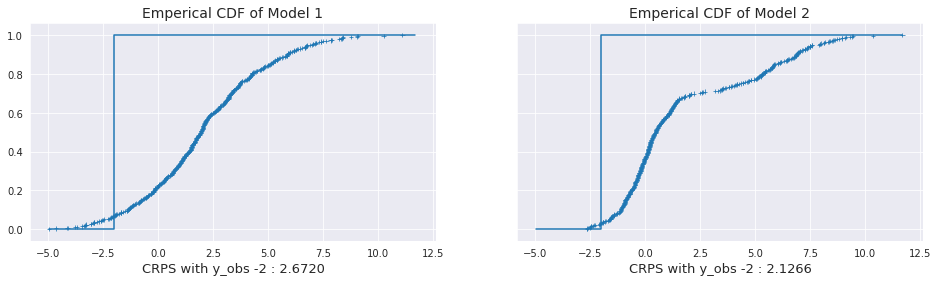

In [23]:
# Insert your single observation value.
Plot_CRPS_forSingleObservation(-2)

#### Produce a ﬁgure with score on the y axis and observation value on the x axis. 

In [12]:
def Plot_CRPS_byObservations(y_obs_list = np.linspace(min_sample,max_sample, 100)): # default range
    CRPS_list_model1 = []
    CRPS_list_model2 = []
    for y_obs in y_obs_list:
        CRPS_list_model1.append(CRPS(samples_model1, y_obs))
        CRPS_list_model2.append(CRPS(samples_model2, y_obs))
        
    # Plot Continuous ranked probaility scores
    fig, axes = plt.subplots(1,2, figsize=(16, 4), sharex=True, sharey=True)
    sns.scatterplot(x=y_obs_list, y=CRPS_list_model1, markers=True, ax=axes[0]).set(
        title="CRPS of Model 1", xlabel="Obervation", ylabel="CRPS")
    sns.scatterplot(x=y_obs_list, y=CRPS_list_model2, markers=True, ax=axes[1]).set(
        title="CRPS of Model 2", xlabel="Obervation", ylabel="CRPS")

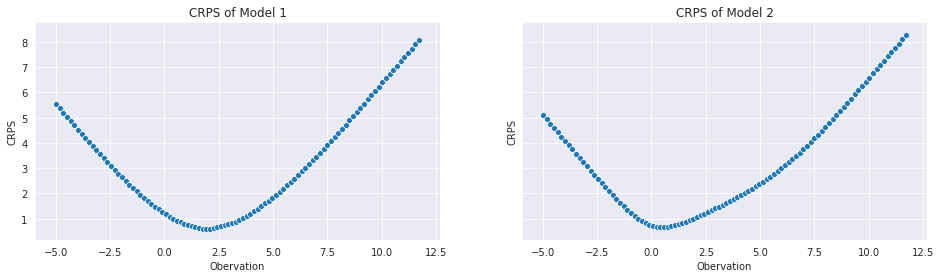

In [13]:
Plot_CRPS_byObservations()

### <Font color=Green> Logarithmic Score

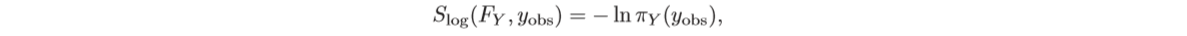

In [15]:
def LogarithmicScore(pdf, x):
    score = -math.log(eval(pdf)(x))
    return score

#### Produce a ﬁgure with score on the y axis and observation value on the x axis. 

In [18]:
def Plot_LogarithmicScore(y_obs_list = np.linspace(min_sample,max_sample, 100)): # default range
    LogScore_list_model = []
    LogScore_list_mode2 = []
    for y_obs in y_obs_list: 
        LogScore_list_model.append(LogarithmicScore("PDF_Model1", y_obs))
        LogScore_list_mode2.append(LogarithmicScore("PDF_Model2", y_obs))

    #print(LogScore_list_model)
    fig, axes = plt.subplots(1,2, figsize=(16, 4), sharex=True, sharey=True)
    sns.lineplot(x=y_obs_list, y=LogScore_list_model, markers=True, ax=axes[0]).set(
        title="Logarithmic Scores of Model 1", xlabel="Obervation", ylabel="Log Score")
    sns.lineplot(x=y_obs_list, y=LogScore_list_mode2, markers=True, ax=axes[1]).set(
        title="Logarithmic Scores of Model 2", xlabel="Obervation", ylabel="Log Score")

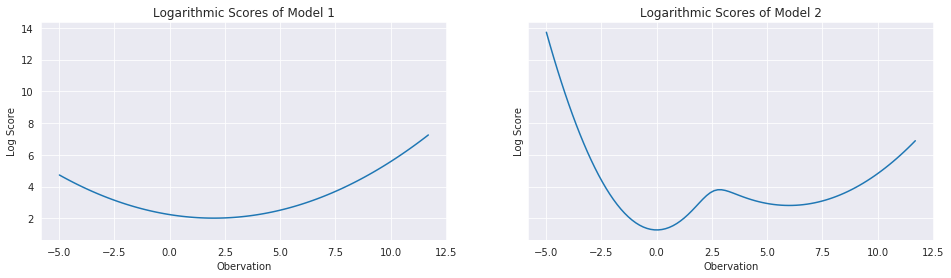

In [19]:
Plot_LogarithmicScore()

#### (extra) Logarithmic Score for a single observation

In [20]:
def Plot_LogScore_forSingleObservation(y_obs):
    fig, axes = plt.subplots(1,2, figsize=(16, 4), sharex=True, sharey=True)
    sns.distplot(samples_model1, bins=50, color="g", ax=axes[0]).set_title("Histogram of Model 1", fontsize=14)
    sns.distplot(samples_model2, bins=50, color="m", ax=axes[1]).set_title("Histogram of Model 2", fontsize=14)

    axes[0].set_xlabel("LogScore with y_obs {}: {:.4f}".format(y_obs,LogarithmicScore("PDF_Model1",y_obs)),fontsize=13)
    axes[1].set_xlabel("LogScore with y_obs {}: {:.4f}".format(y_obs,LogarithmicScore("PDF_Model2",y_obs)),fontsize=13)

    axes[0].axvline(y_obs)
    axes[1].axvline(y_obs)

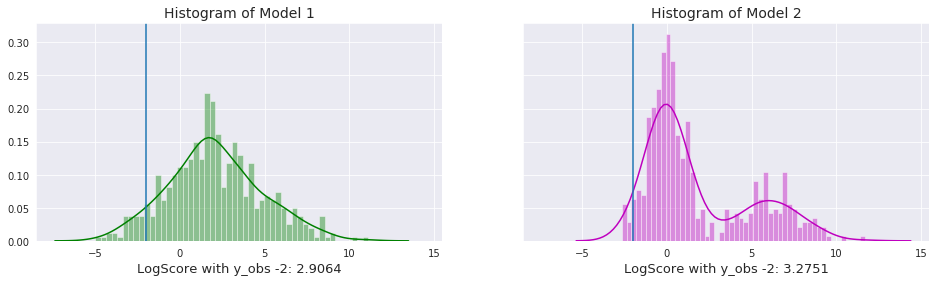

In [21]:
Plot_LogScore_forSingleObservation(-2)

### <Font color=green> Discussion

#### Finding 1
- <Font color=purple> **Logarithmic score is more sensitive than CRPS to low probability observation because Logorithm has an effect of penality.** <br>
- <Font color=purple> **The lower probability, the greater panality.** (see the graph of -log(x) below)

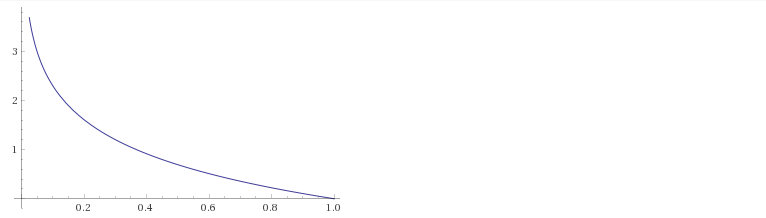